#### Initialize packages
We'll need some Python packages to get our personal data out of Open Humans and to play around with it.

In [1]:
%matplotlib inline

import os, requests, json
import datetime
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Let's now start by getting a list of all the data we have on Open Humans. To do this we need our `access_token`. Using the `os` library we can access it from the environment variables which are set in our notebooks using `os.environ.get('OH_ACCESS_TOKEN')`

In [2]:
response = requests.get("https://www.openhumans.org/api/direct-sharing/project/exchange-member/?access_token={}".format(os.environ.get('OH_ACCESS_TOKEN')))
user = json.loads(response.content)

We now have a `json` object that contains all the details about our user account. We can look at it:

In [3]:
#user #commented out to not leak all download links ;)

Amongst the keys we see that `user["data"]` gives us a list with all data files. Iterating over it gives us the following:

In [4]:
for i,f in enumerate(user['data']):
    print("{}\t{}".format(i,f['basename']))

0	1.json
1	healthkit-export_2015-11-01_2015-11-30_1511288864.58225.json
2	healthkit-export_2015-12-01_2015-12-31_1511288864.58225.json
3	healthkit-export_2015-12-31_2016-01-31_1511297617.26078.json
4	healthkit-export_2016-02-01_2016-02-29_1511297617.26078.json
5	healthkit-export_2016-03-01_2016-03-31_1511297617.26078.json
6	healthkit-export_2016-04-01_2016-04-30_1511297617.26078.json
7	healthkit-export_2016-05-01_2016-05-31_1511297617.26078.json
8	healthkit-export_2016-06-01_2016-06-30_1511297617.26078.json
9	healthkit-export_2016-07-01_2016-07-31_1511297617.26078.json
10	healthkit-export_2016-08-01_2016-08-31_1511297617.26078.json
11	healthkit-export_2016-09-01_2016-09-30_1511297617.26078.json
12	healthkit-export_2016-10-01_2016-10-31_1511297617.26078.json
13	healthkit-export_2016-11-01_2016-11-30_1511297617.26078.json
14	healthkit-export_2016-12-01_2016-12-31_1511297617.26078.json
15	healthkit-export_2017-01-01_2017-01-31_1511297617.26078.json
16	healthkit-export_2017-02-01_2017-02-2

Let's iterate again and grab ouy fitbit data 

In [5]:
for f in user['data']:
    if f['source'] == "fitbit":
        fitbit_download_url = f['download_url']

To download the data we can use `requests` and subsequently convert the downloaded content into a `JSON` object

In [6]:
fitbit_temp = requests.get(fitbit_download_url).content
fitbit = json.loads(fitbit_temp)
fitbit.keys()

dict_keys(['weight-log', 'awake-minutes', 'tracker-minutes-lightly-active', 'tracker-minutes-very-active', 'tracker-calories', 'profile', 'tracker-distance', 'tracker-steps', 'sleep-awakenings', 'minutes-to-sleep', 'sleep-efficiency', 'tracker-activity-calories', 'tracker-minutes-sedentary', 'tracker-minutes-fairly-active', 'sleep-minutes', 'sleep-start-time', 'heart', 'tracker-floors', 'weight', 'tracker-elevation', 'activities-overview', 'time-in-bed', 'sleep-minutes-after-wakeup'])

The keys give us an idea what data is in our fitbit store. Let's have a quick look at the step counts. To do this we convert our JSON file into a `pandas` dataframe which can then be used for plotting.

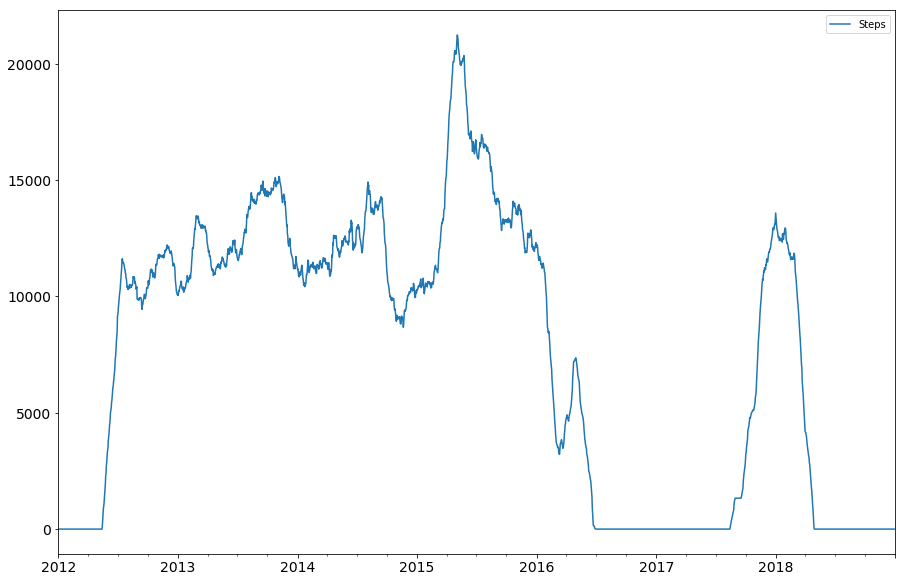

In [7]:
dates = []
steps = []
for year in fitbit['tracker-steps']:
    for entry in fitbit['tracker-steps'][year]['activities-tracker-steps']:
        dates.append(datetime.datetime.strptime(entry['dateTime'], '%Y-%m-%d'))
        steps.append(int(entry['value']))
df = pd.DataFrame(data = {'date': dates, 
                          'steps': steps})
df.sort_values(by=['date'],inplace=True)
df.index = df["date"]

df = df.groupby(df.index.date).sum()
df.index = pd.to_datetime(df.index)
dfr = df.rolling('60d').mean()
pt = dfr.plot(y=['steps'],figsize=(15,10),fontsize=14)
pt.legend(["Steps"])